In [171]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [230]:
df = pd.read_csv("activity_log.csv",sep=",")
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6


In [ ]:
print(df["Activity Type"].unique())
print(df[df["Calories"]=="--"])

In [232]:
def parse_time_string(s):
    try:
        s = s.strip()
        parts = s.split(':')
        if len(parts) == 3:
            # HH:MM:SS(.fff)
            return pd.to_timedelta(s)
        elif len(parts) == 2:
            # MM:SS(.fff) → lo pasamos como '00:MM:SS(.fff)'
            return pd.to_timedelta(f"0:{s}")
        else:
            return pd.NaT
    except Exception:
        return pd.NaT
    
def lineal(x,m,b):
    return m*x + b

In [308]:
#Paso los tiempos a segundos 
df["Time_parsed"] = df["Time"].apply(parse_time_string)
df["Time_seconds"] = df["Time_parsed"].dt.total_seconds()


#Limpio la columna de calorias que tiene entradas -- o entradas escritas como 1,310 (1310)
calories_bool = df["Calories"] != "--"
df["Calories"] = df["Calories"]*calories_bool 
df["Calories"] = df["Calories"].replace({',': ''}, regex=True).apply(pd.to_numeric)
df["Calories"] = np.nan_to_num(df["Calories"])
df = df[df["Calories"] != 0]

#De paso convierto en integers las columnas numéricas 

df["Max HR"] = df["Max HR"].astype(int)
df["Avg HR"] = df["Avg HR"].astype(int)

avg_cadence_bool = df["Avg Run Cadence"] != "--"
df["Avg Run Cadence"] = df["Avg Run Cadence"]*avg_cadence_bool
df["Avg Run Cadence"] = df["Avg Run Cadence"].replace({',': ''}, regex=True).apply(pd.to_numeric)
df["Avg Run Cadence"] = np.nan_to_num(df["Avg Run Cadence"])
df = df[df["Avg Run Cadence"] != 0]

df["Avg Run Cadence"].astype(int)
df["Max Run Cadence"].astype(int)
df["Avg Stride Length"].astype(float)

0      1.26
1      1.29
2      1.17
3      1.24
4      1.18
       ... 
684    1.35
685    1.35
686    1.27
687    1.30
688    1.29
Name: Avg Stride Length, Length: 660, dtype: float64

Por cada milla adicional que corrió el sujeto tardó 415 segundos más
Por cada milla adicional que corrió el sujeto quemó 73 caloría más


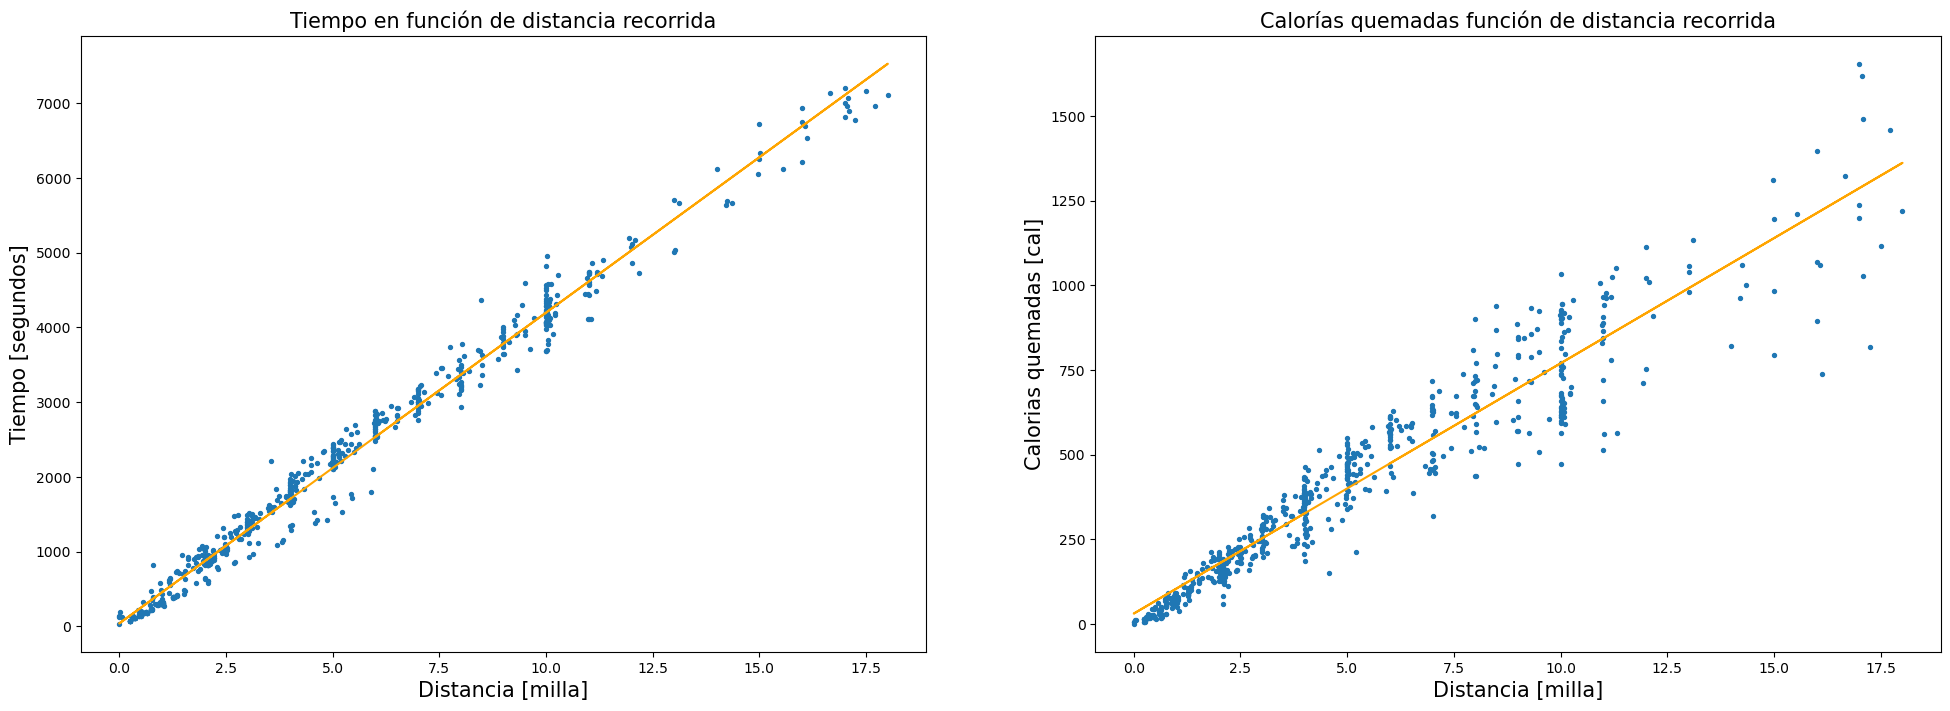

In [310]:
popt_0,pcov_0 = curve_fit(lineal,df["Distance"],df["Time_seconds"]) 
popt_1,pcov_1 = curve_fit(lineal,df["Distance"],df["Calories"]) 


fig,ax = plt.subplots(1,2,figsize=(24,8))

ax[0].scatter(df["Distance"],df["Time_seconds"],s=8)
ax[0].plot(df["Distance"],lineal(df["Distance"],*popt_0),color="orange",label= "")
ax[0].set_xlabel("Distancia [milla]",fontsize="15")
ax[0].set_ylabel("Tiempo [segundos]",fontsize="15")
ax[0].set_title("Tiempo en función de distancia recorrida",fontsize="15")


ax[1].scatter(df["Distance"],df["Calories"],s=8)
ax[1].plot(df["Distance"],lineal(df["Distance"],*popt_1),color="orange",label= "")
ax[1].set_xlabel("Distancia [milla]",fontsize="15")
ax[1].set_ylabel("Calorias quemadas [cal]",fontsize="15")
ax[1].set_title("Calorías quemadas función de distancia recorrida",fontsize="15")

print("Por cada milla adicional que corrió el sujeto tardó " + str(int(popt_0[0])) + " segundos más")
print("Por cada milla adicional que corrió el sujeto quemó " + str(int(popt_1[0])) + " caloría más")

Text(0.5, 1.0, 'Calorías quemadas en función de la FC para una distancia fija')

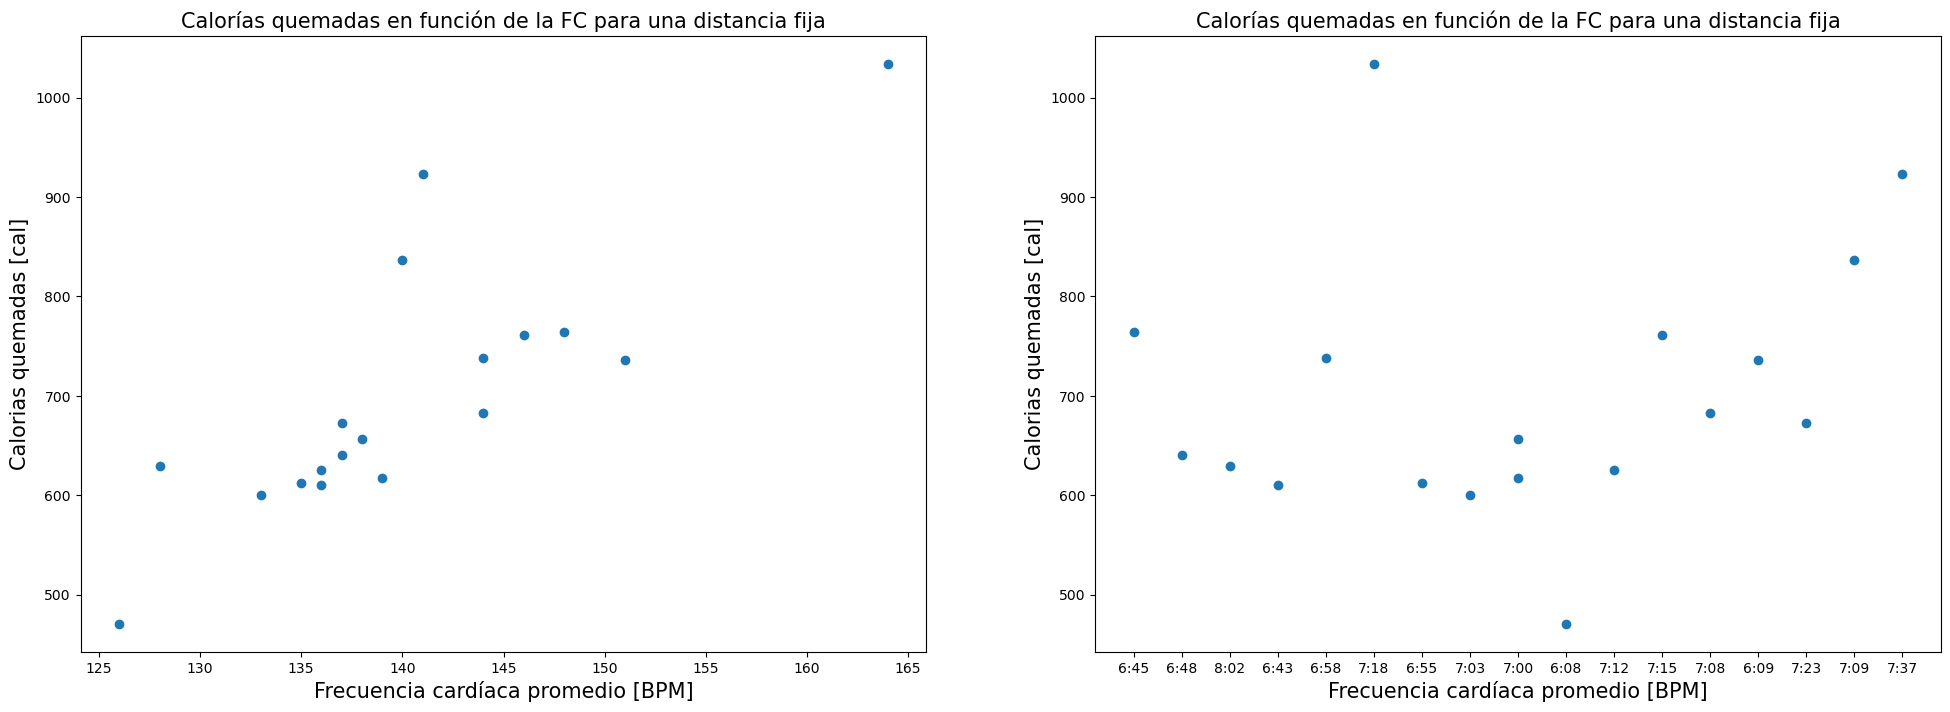

In [317]:
fig, ax = plt.subplots(1,2,figsize=(24,8))


ax[0].scatter(df[df["Distance"]==10]["Avg HR"],df[df["Distance"]==10]["Calories"])
ax[0].set_xlabel("Frecuencia cardíaca promedio [BPM]",fontsize=15)
ax[0].set_ylabel("Calorias quemadas [cal]",fontsize=15)
ax[0].set_title("Calorías quemadas en función de la FC para una distancia fija",fontsize=15)

ax[1].scatter(df[df["Distance"]==10]["Avg Pace"],df[df["Distance"]==10]["Calories"])
ax[1].set_xlabel("Frecuencia cardíaca promedio [BPM]",fontsize=15)
ax[1].set_ylabel("Calorias quemadas [cal]",fontsize=15)
ax[1].set_title("Calorías quemadas en función de la FC para una distancia fija",fontsize=15)

Text(0, 0.5, 'Cantidad de ocurrencias')

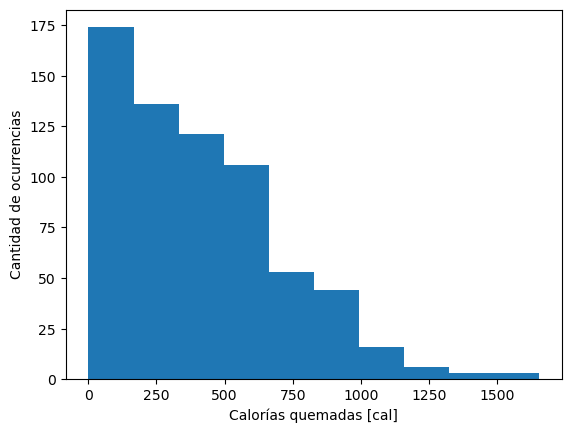

In [281]:
plt.hist(df["Calories"])
plt.xlabel("Calorías quemadas [cal]")
plt.ylabel("Cantidad de ocurrencias")